In [27]:
import re
import pandas as pd

# Fonction pour nettoyer et convertir les notes
def nettoyer_et_convertir_note(note):
    # Supprimer les espaces et remplacer les virgules
    note = note.replace(',', '.')

    # Essayer de trouver un nombre décimal
    match = re.search(r'(\d+(?:\.\d+)?)', note)
    if match:
        try:
            return float(match.group(1))
        except ValueError:
            return None

    return None

# Fonction pour scraper une page spécifique
def scraper_page(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        facts = soup.find_all("div", class_="card-body bg-light rounded")

        blagues_dict = {}
        for fact in facts:
            # Texte de la blague
            blague_texte = fact.find("p", class_="card-text").text.strip()
            # Note de la blague
            note_span = fact.find_next("span", id=lambda x: x and x.startswith("moyenne"))

            if note_span:
              note = note_span.text.strip()
            else:
                note = "Note introuvable"

            # Nettoyer et convertir la note
            note_propre = nettoyer_et_convertir_note(note)

            blagues_dict[blague_texte] = note_propre

        return blagues_dict
    else:
        print(f"Erreur lors du scraping de la page {url}, statut : {response.status_code}")
        return {}

# Fonction principale pour scraper plusieurs pages et compiler les données
def scraper_pages(urls):
    all_blagues_dict = {}
    for url in urls:
        page_blagues = scraper_page(url)
        all_blagues_dict.update(page_blagues)

    df = pd.DataFrame(list(all_blagues_dict.items()), columns=["Blague", "Note"])

    return df

# Générer les URL des 5 premières pages
url_base = "http://www.chucknorrisfacts.fr/facts/top/"
urls_to_scrape = [f"{url_base}{i}" for i in range(1, 6)]

# Scraper les pages et obtenir le DataFrame
df = scraper_pages(urls_to_scrape)

# Afficher un aperçu du DataFrame
df


,Blague,Note
0,Les ennemis des amis de Chuck Norris sont ses ...,8.86
1,"Un jour Chuck Norris a eu un zero en latin, de...",8.43
2,L'avenir se demande parfois ce que Chuck Norri...,8.42
3,Chuck Norris ne sait pas à quoi ressemble Nico...,8.41
4,,8.36
...,...,...
95,Chuck Norris cueille les cerises avec la queue...,8.21
96,"Un jour, Chuck Norris a souri à une inconnue. ...",8.21
97,Chuck Norris n'a pas de père... On ne nique pa...,8.21
98,Chuck Norris peut mettre un headshot au cavali...,8.21


Visualisation avec Plotly

In [33]:
import plotly.express as px

fig1 = px.histogram(df, x="Note", nbins=20, title="Distribution des notes")
fig1.show()

Visualisation avec Bokeh

In [34]:
import numpy as np
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

# Calculer les fréquences des notes avec numpy
hist, edges = np.histogram(df['Note'].dropna(), bins=20)

# Créer la figure Bokeh
fig2 = figure(title="Distribution des notes", x_axis_label='Note', y_axis_label='Fréquence')

# Ajouter l'histogramme en utilisant des rectangles (quad)
fig2.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], fill_color="blue", line_color="white", alpha=0.7)

# Afficher le graphique
output_notebook()
show(fig2)



Visualisation avec Matplotlib

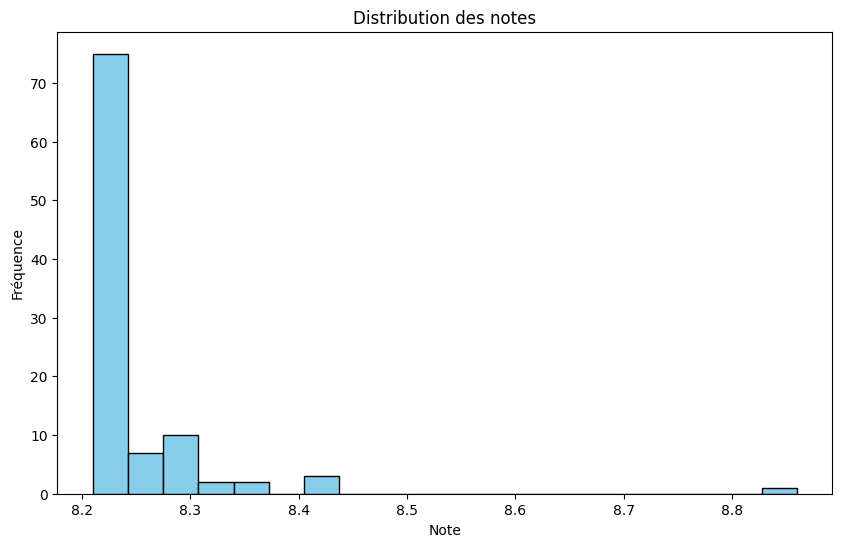

In [35]:
import matplotlib.pyplot as plt

# Visualisation avec Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(df['Note'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution des notes')
plt.xlabel('Note')
plt.ylabel('Fréquence')
plt.show()